## Problem Statement:
You are owning a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. 

You want to understand the customers like who can be easily converged i.e target customers so that the sense can be given to marketing team and plan the strategy accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Loading the data**

In [2]:
data=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
data.shape

(200, 5)

In [6]:
data.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

## **Checking for missing data**

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

So, there are no missing values in the data

## **Checking for Duplicates**

In [8]:
data.duplicated().sum()

0

### Univariate Analysis

#### **Gender**

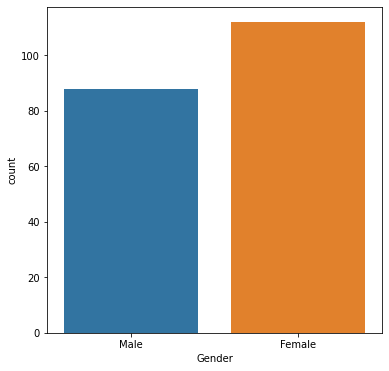

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(data.Gender)
plt.show()

The number of female visitors for the mall is greater than the number of male visitors

#### **Age**

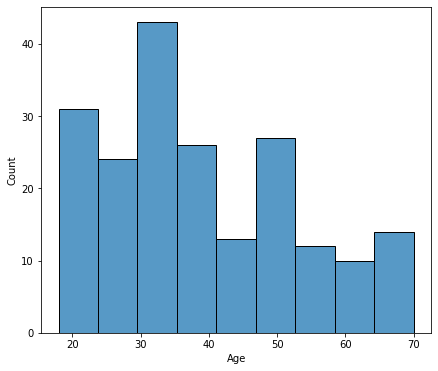

In [10]:
plt.figure(figsize=(7,6))
sns.histplot(data.Age)
plt.show()

The customers of age groups 20-40 are visting the mall more. But there is no clear pattern in the age so let us group them into different age groups.
* Age < 25 => Teens
* Age < 55 => Adults
* Age > 55 => Seniors

In [11]:
data["Age_cat"] = pd.cut(data["Age"], [0, 25, 55, np.inf], labels=['Teens', 'Adults', 'Seniors'])

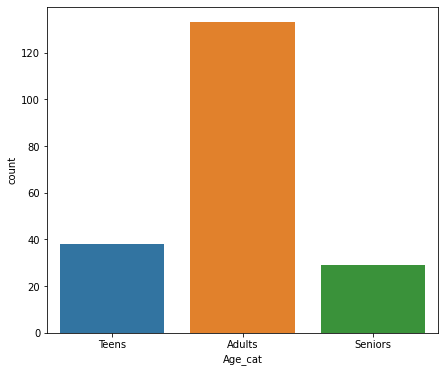

In [12]:
plt.figure(figsize=(7,6))
sns.countplot(data.Age_cat)
plt.show()

So, adults are visiting the mall frequently compared to teens and seniors

#### **Gender and Age**

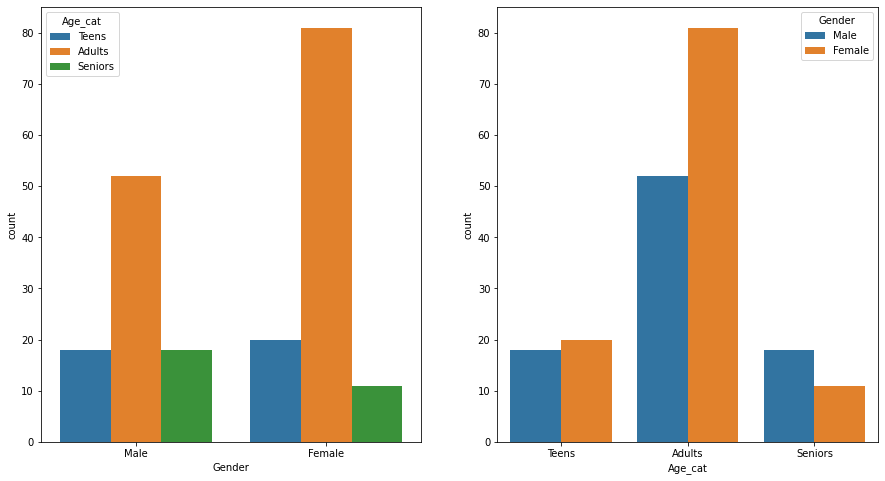

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(x='Gender', data=data, hue='Age_cat')
plt.subplot(1,2,2)
sns.countplot(x='Age_cat', data=data, hue='Gender')
plt.show()

* **More number of females are visting the mall than males**
* **Among teens there isn't much difference between number of male and female visitors**
* **Among adults, females are visiting the mall frequently compared to males**
* **Among seniors, there isn't much difference between male and females**

#### **Average Income**

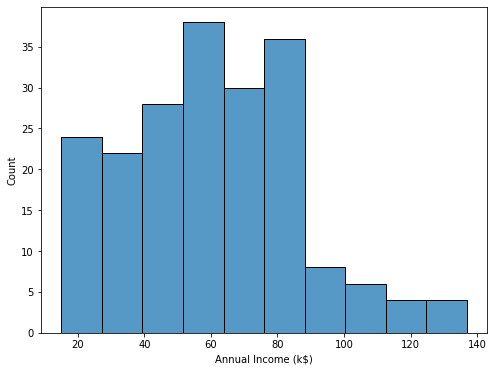

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(data['Annual Income (k$)'])
plt.show()

Majority of visitors of the mall are with the average income range of 60k-80k and very few people with average income >90k are visiting the malls

#### **Spending Score**

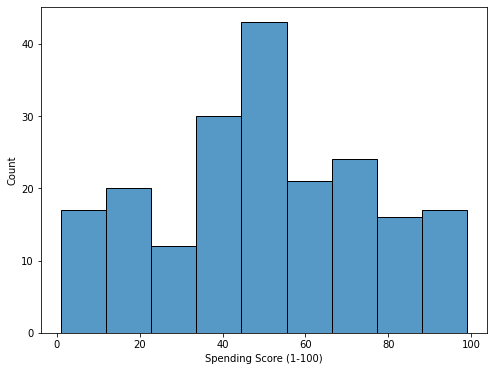

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data['Spending Score (1-100)'])
plt.show()

### Bivariate Analysis

#### **Gender**

In [16]:
male=data[data.Gender=='Male']
female=data[data.Gender=='Female']

male_score=male['Spending Score (1-100)'].mean()
female_score=female['Spending Score (1-100)'].mean()
male_income=male['Annual Income (k$)'].mean()
female_income=female['Annual Income (k$)'].mean()

print("Male Mean Score = {} ".format(male_score))
print()
print("Female Mean Score = {} ".format(female_score))
print()
print("Male Mean Income = {} ".format(male_income))
print()
print("Female Mean Income = {} ".format(female_income))

Male Mean Score = 48.51136363636363 

Female Mean Score = 51.526785714285715 

Male Mean Income = 62.22727272727273 

Female Mean Income = 59.25 


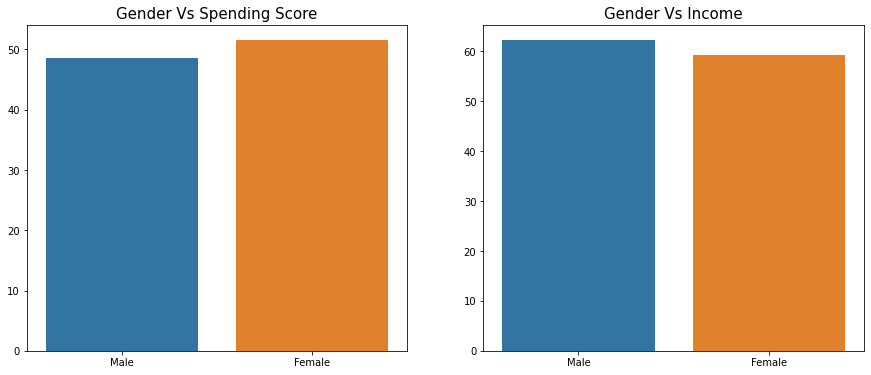

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=['Male','Female'], y=[male_score,female_score])
plt.title('Gender Vs Spending Score',size=15)

plt.subplot(1,2,2)
sns.barplot(x=['Male','Female'], y=[male_income,female_income] )
plt.title('Gender Vs Income',size=15)
plt.show()

The mean spending score and income of males and females are almost equal. So, gender is not a suitable variable to create a cluster with spending score or income

#### **Age**

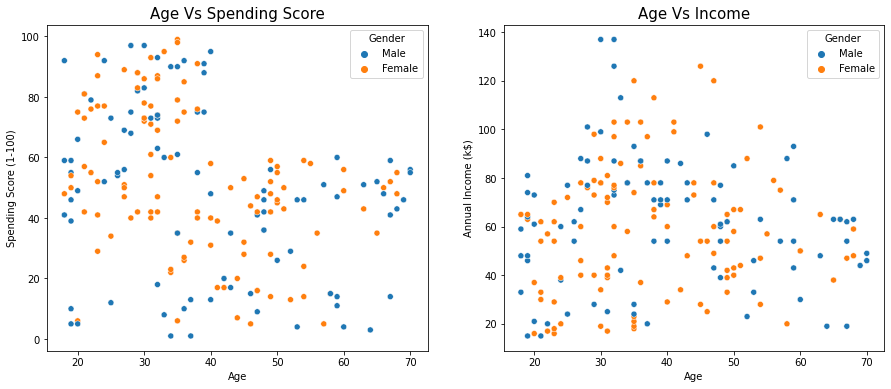

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(x = data.Age, y = data['Spending Score (1-100)'],hue=data['Gender'])
plt.title('Age Vs Spending Score',size=15)

plt.subplot(1,2,2)
sns.scatterplot(x = data.Age, y = data['Annual Income (k$)'],hue=data['Gender'])
plt.title('Age Vs Income',size=15)
plt.show()

It seems like it is easier to form clusters using Age and Spending Score. So, Age and Spending Score are better attributes for forming clusters and Age and Income are not better attributes for clustering

#### **Spending Score and Income**

Text(0.5, 1.0, 'Income Vs Spending Score')

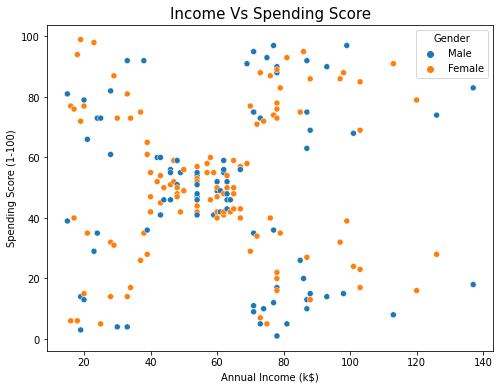

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['Annual Income (k$)'],y=data['Spending Score (1-100)'],hue=data['Gender'])
plt.title('Income Vs Spending Score',size=15)

The scatter plot of Income Vs Spending Score clearly shows different clusters forming in the data.So, Income and Score are good attributes for clustering

### K-Means Clustering

In [20]:
def elbow_graph(X):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title('The Elbow Point Graph')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

#### Clustering with Age and Spending Score

In [21]:
from sklearn.cluster import KMeans
X = data[['Age', 'Spending Score (1-100)']]
X.head(5)

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


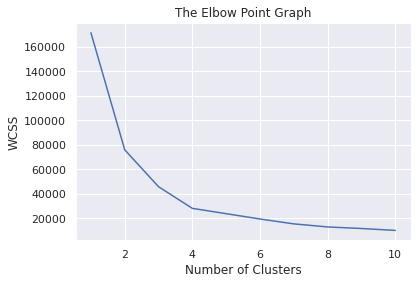

In [22]:
elbow_graph(X)

The Elbow graph shows the abrupt shift of curve at 4. So, th optimal number of clusters are 4.

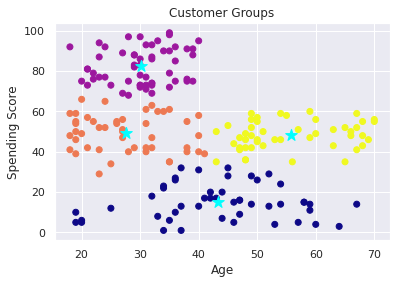

In [23]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y,cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150,marker='*' ,c='cyan')
plt.title('Customer Groups')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

#### Clustering with Income and Spending Score

In [24]:
X2 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X2.head(5)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


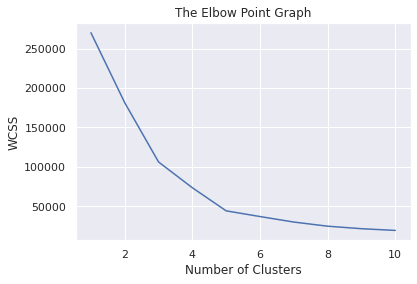

In [25]:
elbow_graph(X2)

So, the graph takes a abrupt shift at 5. So, optimal number of clusters to be formed are 5.

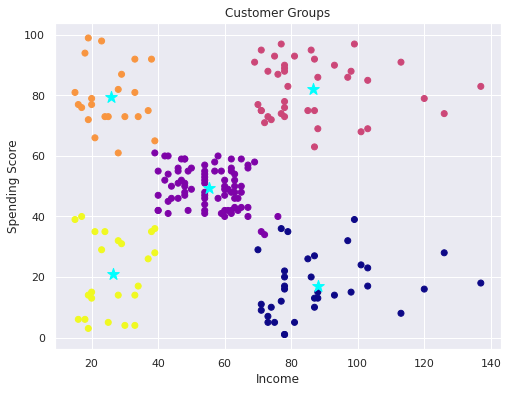

In [26]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y2 = kmeans.fit_predict(X2)
plt.figure(figsize=(8,6))
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],c=Y2,cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150,marker='*' ,c='cyan')
plt.title('Customer Groups')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()